# Simple password generator

## Functional approach

In [1]:
import numpy as np
import string as s

In [19]:
def passGen(lenght=12, numbers=True, chars=True, symbols=True, upper=True):
    
    """Simple password maker with five arguments and information about it strenght."""
    
    if lenght < 1 or numbers==False and chars==False and symbols==False and upper==False:
    
        print("_"*105) 
        print("\nAt least lenght and one argument must be given.")
        print("_"*105) 
        print("")    
                
    else:
        
        num, char, symb, upper_char = s.digits, s.ascii_lowercase, s.punctuation, s.ascii_uppercase 
        bin = []
    
        if numbers == True:
            bin.extend(num)
        if chars == True:
            bin.extend(char)
        if symbols == True:
            bin.extend(symb)
        if upper == True:
            bin.extend(upper_char)

        passwd = "".join(np.random.choice(bin, size=lenght))

        print("\n",passwd)
                
        # https://thycotic.force.com/support/s/article/Calculating-Password-Complexity
        # 588235 per second modern computer

        combinations = len(bin)**lenght
        time = ((1.7*10**-6*combinations)/2)/86400/365 

        print("_"*105)
        print(f"\nYour password is constructed with {lenght} elements from a {len(bin)} elements set.") 
        print(f"It has {combinations:,d} possible combinations. \nIt will take approximatelly:")
        print(f"~ {round(time,2)} years to crack your password on a modern computer (8 core, 2.8 GHz processor).")
        print(f"~ {round(time/100,2)} years to crack  your password  on a modern computer equipped with GPU or 3D card.")
        print(f"~ {round(time/100000,2)} years to crack  your password on a supercomputer or a botnet.")
        print("_"*105,"\n")


In [20]:
passGen(14,1,0,0,1)


 4GG0X1G65PRZHK
_________________________________________________________________________________________________________

Your password is constructed with 14 elements from a 36 elements set.
It has 6,140,942,214,464,815,497,216 possible combinations. 
It will take approximatelly:
~ 165518800.17 years to crack your password on a modern computer (8 core, 2.8 GHz processor).
~ 1655188.0 years to crack  your password  on a modern computer equipped with GPU or 3D card.
~ 1655.19 years to crack  your password on a supercomputer or a botnet.
_________________________________________________________________________________________________________ 



## Using TKinter GUI

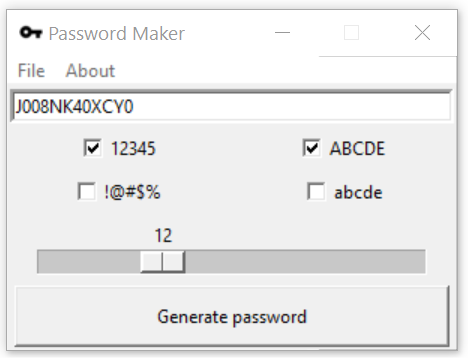

In [18]:
from IPython.display import Image
Image("pass.png", width=351, height=268)

In [14]:
import numpy as np
import string as s
import tkinter as tk

In [15]:
# creating main window
root = tk.Tk()
root.title("Password Maker")
root.iconbitmap("key.ico")
root.resizable(False, False)
#root.geometry("300x300")

# variables
LENGHT = tk.IntVar()
NUMBERS = tk.BooleanVar()
CHARACTERS = tk.BooleanVar()
UPPER = tk.BooleanVar()
SYMBOLS = tk.BooleanVar()

def passGen():
    
    lenght = LENGHT.get()
    numbers = NUMBERS.get()
    chars = CHARACTERS.get()
    symbols = SYMBOLS.get()
    upper = UPPER.get()
    
    if lenght == 0 or numbers==0 and chars==0 and symbols==0 and upper==0:
        pass 
                
    else:
        num, char, symb, upper_char = s.digits, s.ascii_lowercase, s.punctuation, s.ascii_uppercase 
        bin = []
    
        if numbers == 1:
            bin.extend(num)
        if chars == 1:
            bin.extend(char)
        if symbols == 1:
            bin.extend(symb)
        if upper == 1:
            bin.extend(upper_char)
        
        passwd = "".join(np.random.choice(bin, size=lenght))
        e.delete(0,"end")
        e.insert(0,passwd)
        
# menus action
def create_window():
    about_window = tk.Toplevel(root)
    about_window.title("About")
    about_window.geometry("300x100")
    aboutlabel = tk.Label(about_window, text="\n\nCopyright Mark Montoya 2020\nVersion 1.0")
    aboutlabel.pack()
    
# creating menus
menubar = tk.Menu(root)
filemenu = tk.Menu(menubar, tearoff=0)
filemenu.add_command(label="Exit", command=root.destroy)
menubar.add_cascade(label="File", menu=filemenu)

aboutmenu = tk.Menu(menubar, tearoff=0)
menubar.add_cascade(label="About", command=create_window)
root.config(menu=menubar)

# creating output space 
e = tk.Entry(root, width=48, borderwidth=3)

# defining elements
checkBox1 = tk.Checkbutton(root, text="12345", onvalue=1, offvalue=0, variable=NUMBERS)
checkBox2 = tk.Checkbutton(root, text="ABCDE", onvalue=1, offvalue=0, variable=UPPER)
checkBox3 = tk.Checkbutton(root, text="!@#$%", onvalue=1, offvalue=0, variable=SYMBOLS)
checkBox4 = tk.Checkbutton(root, text="abcde", onvalue=1, offvalue=0, variable=CHARACTERS)
passLenght = tk.Scale(root, from_=0, to=40, orient="horizontal", length=260, variable=LENGHT)
passLenght.set(12)
generate = tk.Button(root,text="Generate password", height=2, width=40, command=passGen)

# constructing grid
e.grid(row=0, column=0, columnspan=2, padx=2,pady=2)
checkBox1.grid(row=2,column=0, padx=2,pady=2)
checkBox2.grid(row=2,column=1, padx=2,pady=2)
checkBox3.grid(row=3,column=0, padx=2,pady=2)
checkBox4.grid(row=3,column=1, padx=2,pady=2)
passLenght.grid(row=5,column=0, columnspan=2, padx=2,pady=2)
generate.grid(row=7,column=0, columnspan=2, padx=2,pady=2)

root.mainloop()